<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#A60505; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Mango Leaf Diseas Classification </div>

<center>
    <img src='https://1.bp.blogspot.com/-3NVFdJH0sY4/X1UbWI9xKMI/AAAAAAAADDM/qYt_kDpkJbw72ZXbmqz1u64X-VMEfIhlACLcBGAsYHQ/s640/Mango%2Banthracnose.jpg'>
</center>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:#B21010;font-family:sans-serif;color:#FFF9ED;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
* [1. Introduction](#1)
    
* [2. Import Necessaries](#2)
    
* [3. EDA](#3)

    * [3.1. Define data path and dataset name](#3.1)
    * [3.2. Create Dataframe for the dataset](#3.2)
    * [3.3. Display Number of Examples in the dataset](#3.3)
    * [3.4. Display Number of Classes in the dataset](#3.4)
    * [3.5. Display count of images in each class of the dataset](#3.5)
    * [3.6. Visualize Each Class in the dataset](#3.6)
    * [3.7. Check Null values in the dataframe](#3.7)
    * [3.8. Visualize Null values](#3.8)
    
    
* [4. Split dataframe into train, valid, and test](#4)
     
* [5. Create Image Data Generator](#5)

* [6. Visualize Training dataset](#6)

* [7. Model Structure](#7)

    * [7.1. Generic Model Creation](#7.1)
    * [7.2. Define Early Stop](#7.2)
    * [7.3. Train model](#7.3)
    

* [8. Evaluate Model](#8)

    * [8.1. Plot accuarcy and loss curve](#8.1)
    * [8.2. Model Accuarcy](#8.2)
    * [8.3. Get Predictions](#8.3)
    

* [9. Save the Model](#9)

* [10. Load Model and Predict Inputs](#10)

* [11. AUTHOR MESSAGE](#12)



<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> Introduction</b>


<div style="border-radius:10px;
            border: black solid;
            adding: 15px;
            background-color:#FBA7A7;
            font-size:120%;
            text-aling: left">
<h3 style:'border:0; border-radius: 15px; color: black'><center> Steps we will go through:</center></h3>

_________________________________________________________________________
    
Developing a mango leaf disease classifier can be extremely beneficial for agriculture, as it could assist farmers in early detection and management of diseases, ultimately improving crop yield and quality.
    
we will walk through this steps:
    
1. Load the data by storing each image path in a list and its corresponding label in another list<br>
2. Transform the lists into dataframe<br>
3. EDA and analyze the data for more insights
4. Split the data into train, test and validation datasets<br>
5. Create Data Generator for Train, Test and validation datasets<br>
Tensorflow Generators are very useful to Generate batches of tensor image data with real-time data augmentation.<br>
6. Load the pretrained model, add some layers on top of its base layer and compile it<br>
We will be using EffiecentNet, of course you can use any pretrained model you want and tune its architecture and parameters!<br>
7. Evaluate the model by plotting acc and loss curves, plot confussion matrix and print classification report<br>
8. Save The model to use it in production
9. Load The model and predict inputs

<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> Import Necessaries</b>

In [1]:
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


modules loaded


<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> EDA</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#B21010'>||</span> Define data path and dataset name</b>

In [2]:
data_dir = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset'
ds_name = 'Mango Leaf Disease'

<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>||</span> Create Dataframe for the dataset</b>

In [3]:
# Generate data paths with labels

def generate_data_paths(data_dir):
    
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
            
    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)

In [4]:
def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)
    
    return df

df = create_df(filepaths, labels)

In [5]:
df.head()

,filepaths,labels
0,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
1,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
2,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
3,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
4,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew


<a id="3.3"></a>
### <b>3.3 <span style='color:#B21010'>||</span> Display Number of Examples in the dataset</b>

In [6]:
def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} images.")
    
num_of_examples(df, ds_name)

The Mango Leaf Disease dataset has 4000 images.


<a id="3.4"></a>
### <b>3.4 <span style='color:#B21010'>||</span> Display Number of Classes in the dataset</b>

In [7]:
def num_of_classes(df, name='df'):
    print(f"The {name} dataset has {len(df['labels'].unique())} classes")
    
num_of_classes(df, ds_name)

The Mango Leaf Disease dataset has 8 classes


<a id="3.5"></a>
### <b>3.5 <span style='color:#B21010'>||</span> Display count of images in each class of the dataset</b>

In [8]:
def classes_count(df, name='df'):
    
    print(f"The {name} dataset has: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"Class '{name}' has {num_class} images")
        print('-'*70)
        
classes_count(df, ds_name)

The Mango Leaf Disease dataset has: 

Class 'Powdery Mildew' has 500 images
----------------------------------------------------------------------
Class 'Cutting Weevil' has 500 images
----------------------------------------------------------------------
Class 'Anthracnose' has 500 images
----------------------------------------------------------------------
Class 'Bacterial Canker' has 500 images
----------------------------------------------------------------------
Class 'Sooty Mould' has 500 images
----------------------------------------------------------------------
Class 'Gall Midge' has 500 images
----------------------------------------------------------------------
Class 'Healthy' has 500 images
----------------------------------------------------------------------
Class 'Die Back' has 500 images
----------------------------------------------------------------------


<a id="3.6"></a>
### <b>3.6 <span style='color:#B21010'>||</span> Visualize Each Class in the dataset</b>

In [9]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "bar"}, {'type': 'pie'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=20),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors)),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)
    
    
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

cat_summary_with_graph(df,'labels')

<a id="3.7"></a>
### <b>3.7 <span style='color:#B21010'>||</span> Check Null values in the dataframe</b>

In [10]:
def check_null_values(df, name='df'):
    
    num_null_vals = sum(df.isnull().sum().values)
    
    if not num_null_vals:
        print(f"The {name} dataset has no null values")
    
    else:
        print(f"The {name} dataset has {num_null_vals} null values")
        print('-'*70)
        print('Total null values in each column:\n')
        print(df.isnull().sum())
        

check_null_values(df, ds_name)

The Mango Leaf Disease dataset has no null values


<a id="3.8"></a>
### <b>3.8 <span style='color:#B21010'>||</span> Visualize Null values</b>

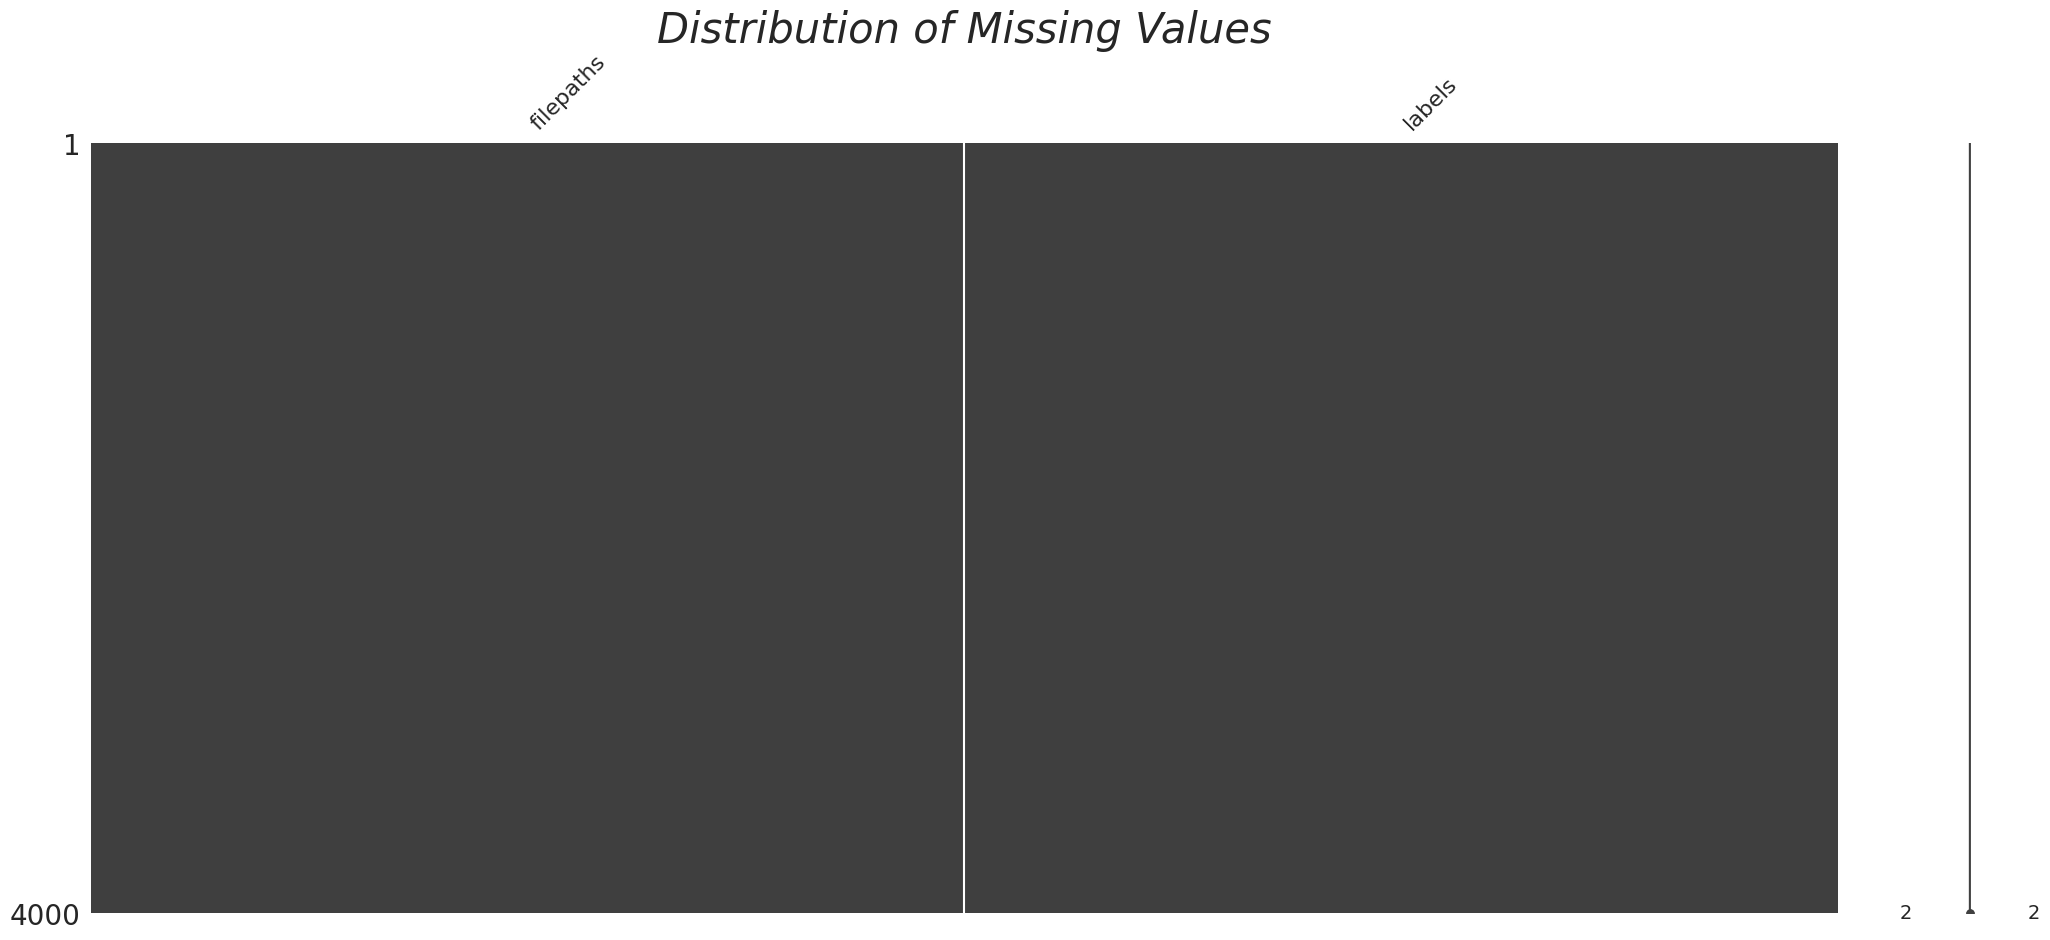

In [11]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span>Split dataframe into train, valid, and test</b>

In [12]:
df.head()

,filepaths,labels
0,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
1,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
2,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
3,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew
4,/kaggle/input/mango-leaf-disease-dataset/Mango...,Powdery Mildew


In [13]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [14]:
def num_imgs(df, name='df'):
    print(f"Number of {name} dataset is {len(df)} images")

In [15]:
num_imgs(train_df, 'Training '+ds_name)
num_imgs(valid_df, 'Validation '+ds_name)
num_imgs(test_df, 'Testing '+ds_name)

Number of Training Mango Leaf Disease dataset is 2800 images
Number of Validation Mango Leaf Disease dataset is 600 images
Number of Testing Mango Leaf Disease dataset is 600 images


In [16]:
num_of_classes(train_df, "Training "+ds_name)
num_of_classes(valid_df, "Validation "+ds_name)
num_of_classes(test_df, "Testing "+ds_name)

The Training Mango Leaf Disease dataset has 8 classes
The Validation Mango Leaf Disease dataset has 8 classes
The Testing Mango Leaf Disease dataset has 8 classes


In [17]:
classes_count(train_df, 'Training '+ds_name)

The Training Mango Leaf Disease dataset has: 

Class 'Bacterial Canker' has 354 images
----------------------------------------------------------------------
Class 'Healthy' has 353 images
----------------------------------------------------------------------
Class 'Anthracnose' has 348 images
----------------------------------------------------------------------
Class 'Powdery Mildew' has 365 images
----------------------------------------------------------------------
Class 'Sooty Mould' has 365 images
----------------------------------------------------------------------
Class 'Die Back' has 343 images
----------------------------------------------------------------------
Class 'Cutting Weevil' has 322 images
----------------------------------------------------------------------
Class 'Gall Midge' has 350 images
----------------------------------------------------------------------


In [18]:
classes_count(valid_df, 'Validation '+ds_name)

The Validation Mango Leaf Disease dataset has: 

Class 'Cutting Weevil' has 95 images
----------------------------------------------------------------------
Class 'Powdery Mildew' has 70 images
----------------------------------------------------------------------
Class 'Gall Midge' has 75 images
----------------------------------------------------------------------
Class 'Bacterial Canker' has 67 images
----------------------------------------------------------------------
Class 'Anthracnose' has 78 images
----------------------------------------------------------------------
Class 'Die Back' has 84 images
----------------------------------------------------------------------
Class 'Healthy' has 70 images
----------------------------------------------------------------------
Class 'Sooty Mould' has 61 images
----------------------------------------------------------------------


In [19]:
classes_count(test_df, 'Testing '+ds_name)

The Testing Mango Leaf Disease dataset has: 

Class 'Powdery Mildew' has 65 images
----------------------------------------------------------------------
Class 'Die Back' has 73 images
----------------------------------------------------------------------
Class 'Anthracnose' has 74 images
----------------------------------------------------------------------
Class 'Cutting Weevil' has 83 images
----------------------------------------------------------------------
Class 'Bacterial Canker' has 79 images
----------------------------------------------------------------------
Class 'Gall Midge' has 75 images
----------------------------------------------------------------------
Class 'Healthy' has 77 images
----------------------------------------------------------------------
Class 'Sooty Mould' has 74 images
----------------------------------------------------------------------


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span>Create Image Data Generator</b>

In [20]:
# crobed image size
batch_size = 40
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

train_gen = tr_gen.flow_from_dataframe(train_df, 
                                       x_col = 'filepaths', 
                                       y_col= 'labels', 
                                       target_size = img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size=batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, 
                                       x_col= 'filepaths', 
                                       y_col= 'labels', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df, 
                                      x_col= 'filepaths', 
                                      y_col= 'labels', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= 'rgb', 
                                      shuffle= False, 
                                      batch_size= test_batch_size)

Found 2800 validated image filenames belonging to 8 classes.
Found 600 validated image filenames belonging to 8 classes.
Found 600 validated image filenames belonging to 8 classes.


<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span>Visualize Training dataset</b>

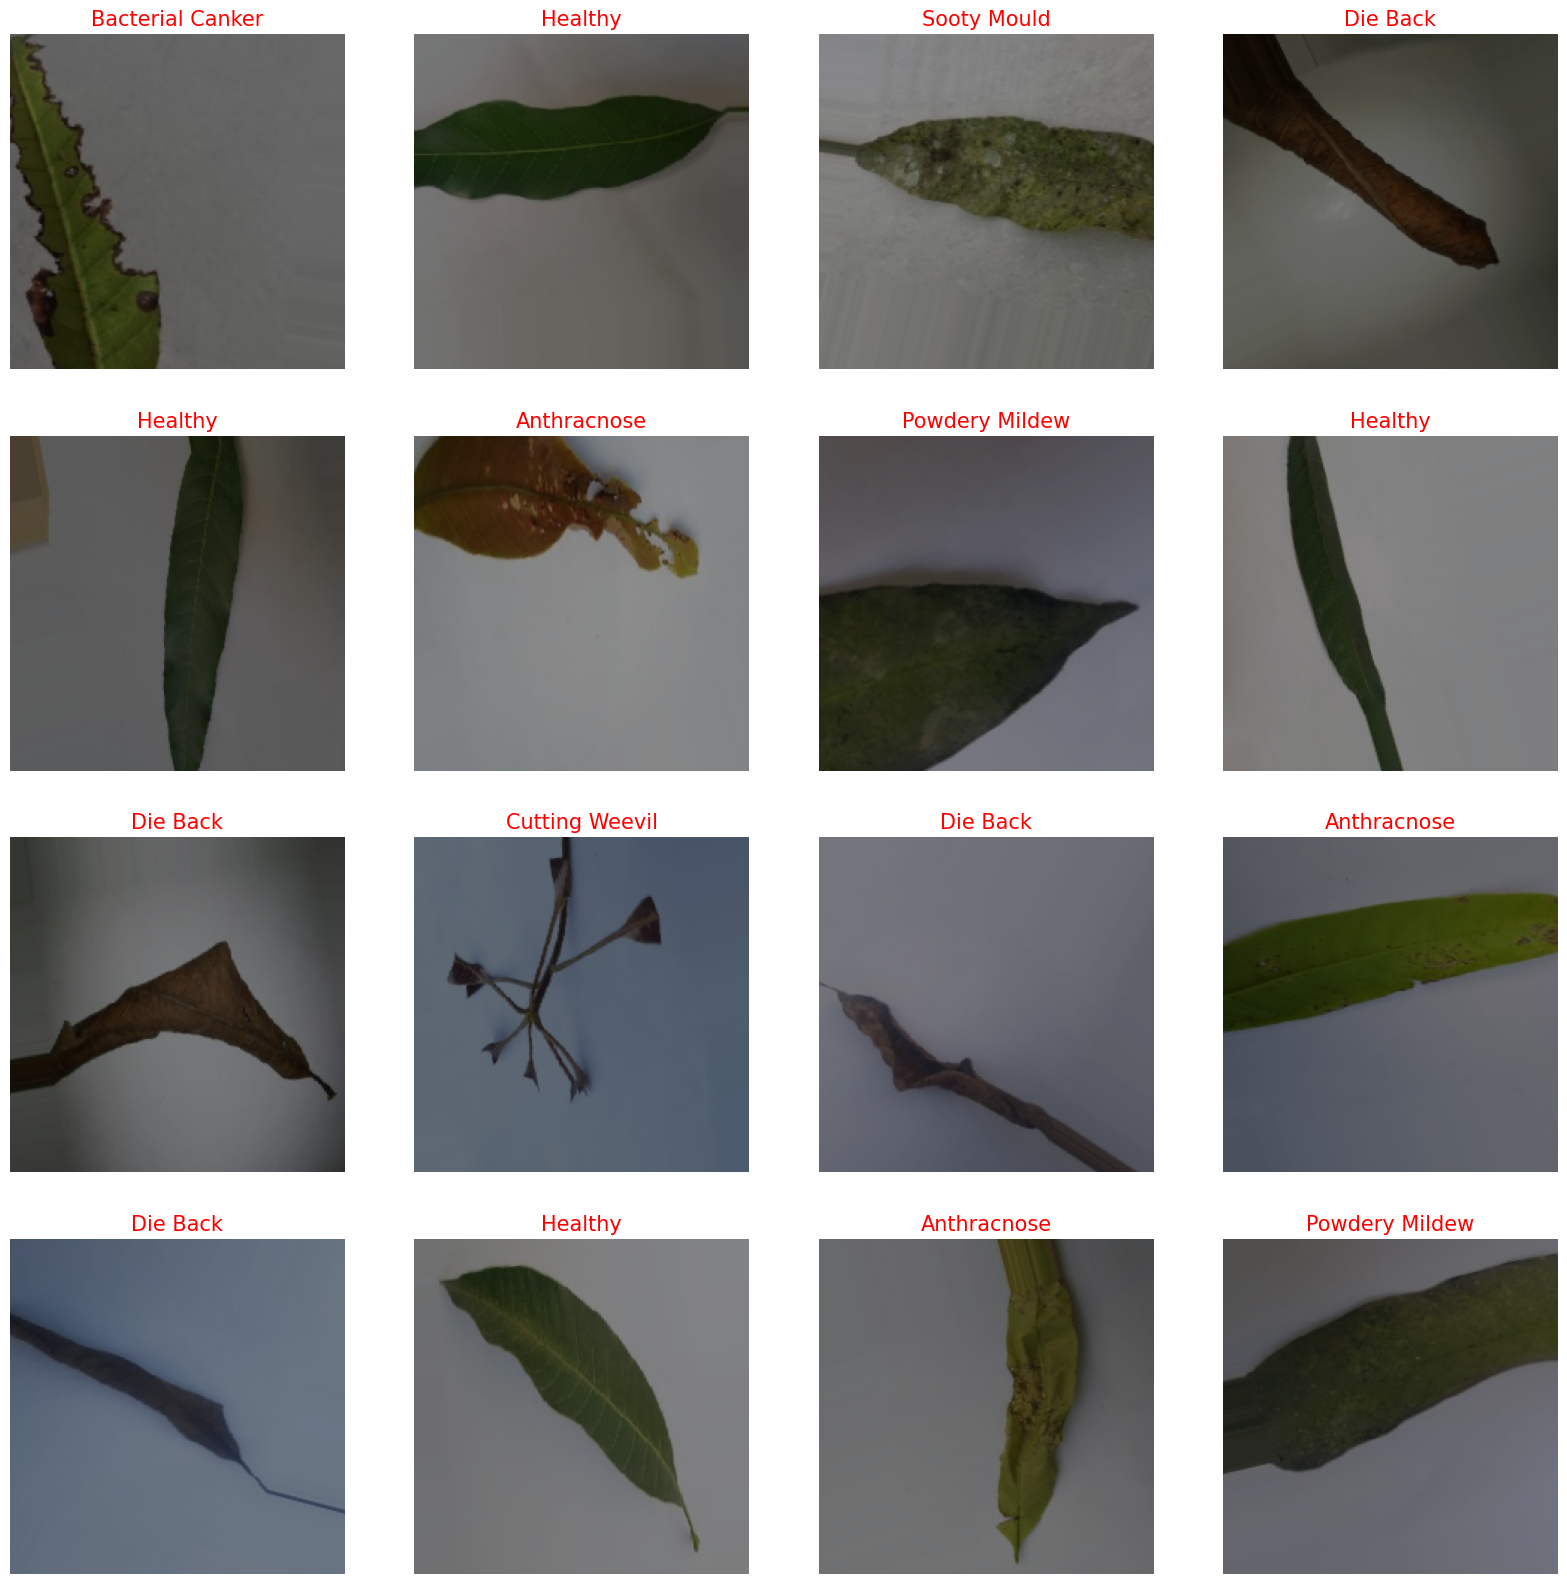

In [26]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'red', fontsize= 15)
    plt.axis('off')
    
plt.show()

<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span>Model Structure</b>

<a id="7.1"></a>
### <b>7.1 <span style='color:#B21010'>||</span>Generic Model Creation</b>

In [30]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb7 from EfficientNet family.

base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(128,kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation = 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 batch_normalization_2 (Bat  (None, 2560)              10240     
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               327808    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 64436767 (245.81 MB)
Trainable params: 3

<a id="7.2"></a>
### <b>7.2 <span style='color:#B21010'>||</span>Define Early Stop</b>

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True,
                               mode='min',
                              )

<a id="7.3"></a>
### <b>7.3 <span style='color:#B21010'>||</span>Train Model</b>

In [32]:
batch_size = 16   # set batch size for training
epochs = 50   # number of all epochs in training

history = model.fit(x=train_gen,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = valid_gen, 
                    validation_steps = None,
                    shuffle = False,
                    batch_size = batch_size,
                    callbacks = [early_stopping])

Epoch 1/50


2023-12-21 18:12:50.212640: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


70/70 [==============================] - 78s 773ms/step - loss: 4.8178 - accuracy: 0.7357 - val_loss: 3.8237 - val_accuracy: 0.8550
Epoch 2/50
70/70 [==============================] - 50s 704ms/step - loss: 3.2265 - accuracy: 0.8479 - val_loss: 2.5486 - val_accuracy: 0.8900
Epoch 3/50
70/70 [==============================] - 49s 696ms/step - loss: 2.2714 - accuracy: 0.8796 - val_loss: 1.7948 - val_accuracy: 0.9333
Epoch 4/50
70/70 [==============================] - 49s 697ms/step - loss: 1.6666 - accuracy: 0.8986 - val_loss: 1.3047 - val_accuracy: 0.9400
Epoch 5/50
70/70 [==============================] - 49s 696ms/step - loss: 1.3677 - accuracy: 0.8918 - val_loss: 1.1138 - val_accuracy: 0.9467
Epoch 6/50
70/70 [==============================] - 50s 706ms/step - loss: 1.1849 - accuracy: 0.8982 - val_loss: 0.9106 - val_accuracy: 0.9600
Epoch 7/50
70/70 [==============================] - 49s 698ms/step - loss: 1.0608 - accuracy: 0.8982 - val_loss: 0.8667 - val_accuracy: 0.9600
Epoch 8/50

<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span>Evaluate Model</b>

<a id="8.1"></a>
### <b>8.1 <span style='color:#B21010'>||</span>Plot accuarcy and loss curve </b>

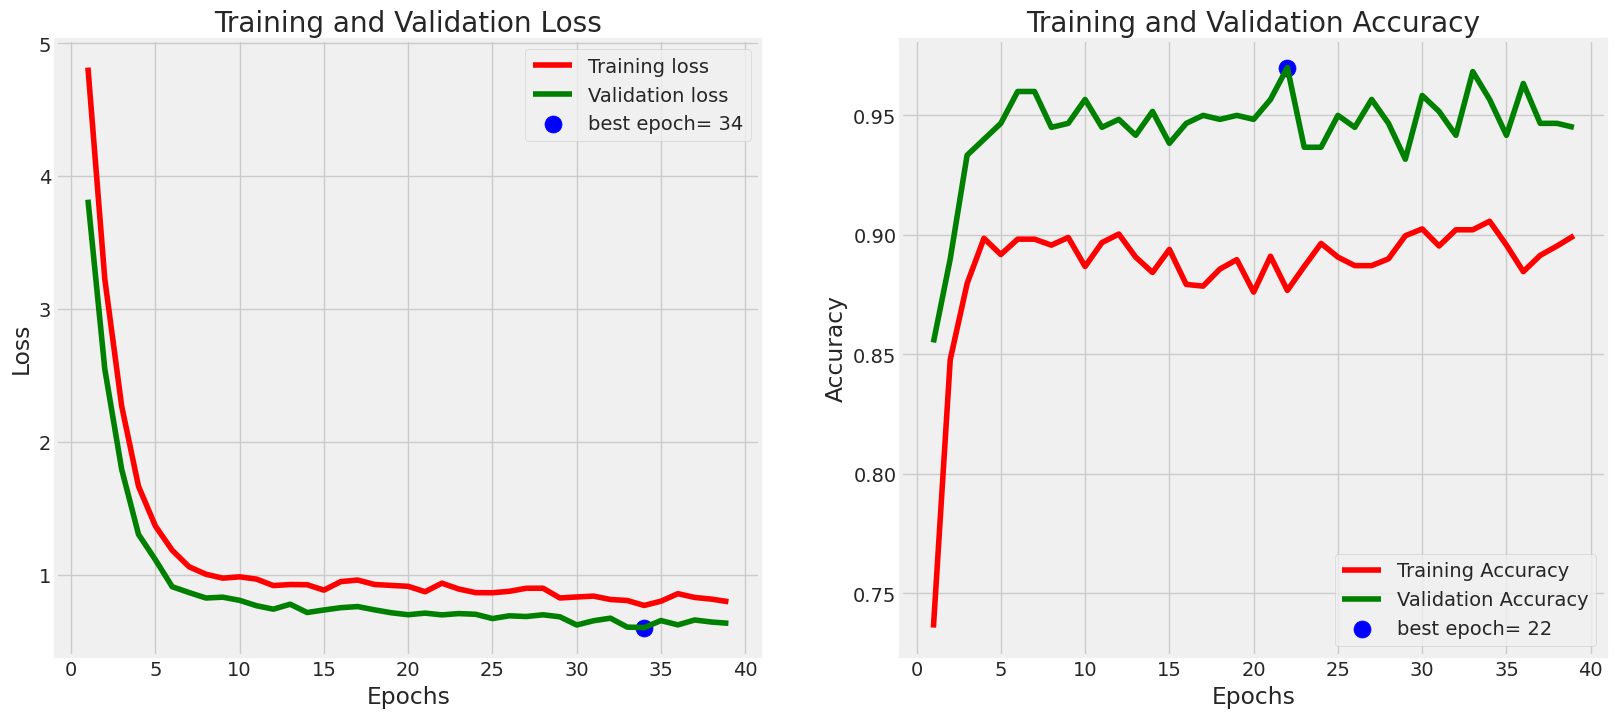

In [33]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

<a id="8.2"></a>
### <b>8.2 <span style='color:#B21010'>||</span>Model Accuarcy</b>

In [34]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

8/8 [==============================] - 12s 1s/step - loss: 0.6108 - accuracy: 0.9500
Train Loss:  0.5912439227104187
Train Accuracy:  0.96875
--------------------
Validation Loss:  0.6495634913444519
Validation Accuracy:  0.9312499761581421
--------------------
Test Loss:  0.6107668280601501
Test Accuracy:  0.949999988079071


<a id="8.3"></a>
### <b>8.3 <span style='color:#B21010'>||</span>Get Prediction</b>

In [37]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

<a id="8.4"></a>
### <b>8.4 <span style='color:#B21010'>||</span>Confussion Matrix</b>

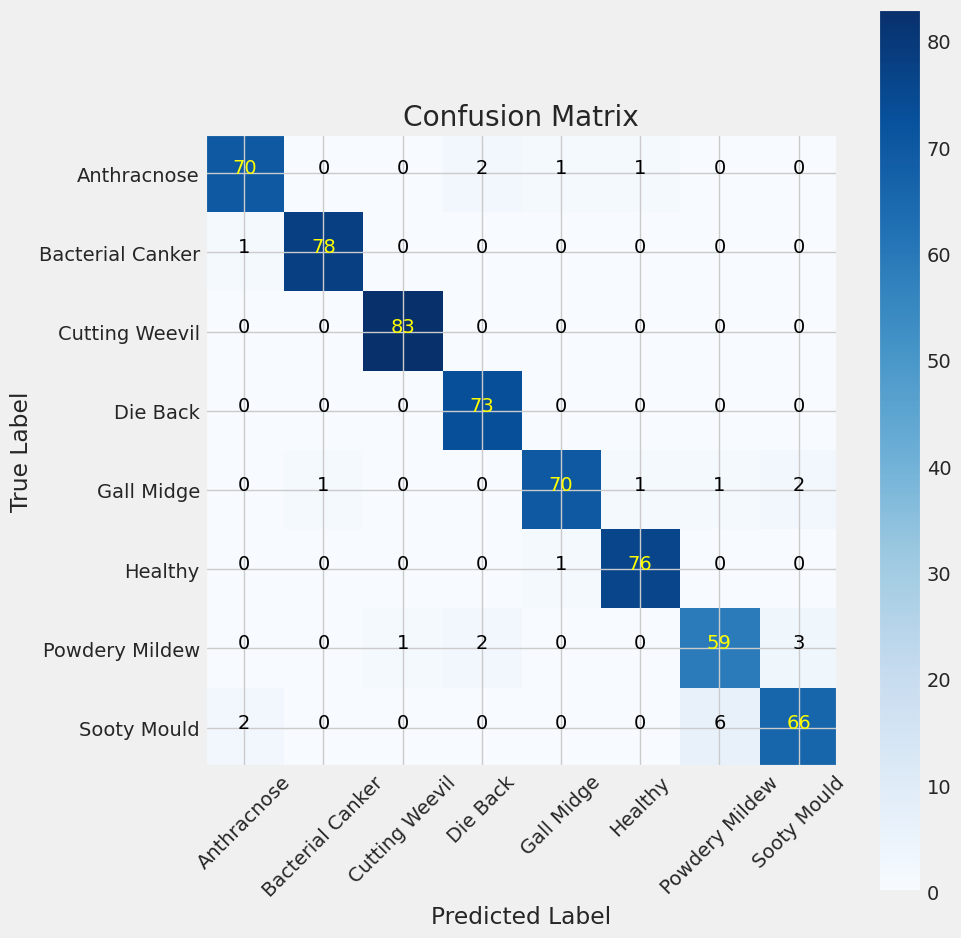

In [38]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'yellow' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

<a id="8.5"></a>
### <b>8.5 <span style='color:#B21010'>||</span>Classification Report</b>

In [39]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

     Anthracnose       0.96      0.95      0.95        74
Bacterial Canker       0.99      0.99      0.99        79
  Cutting Weevil       0.99      1.00      0.99        83
        Die Back       0.95      1.00      0.97        73
      Gall Midge       0.97      0.93      0.95        75
         Healthy       0.97      0.99      0.98        77
  Powdery Mildew       0.89      0.91      0.90        65
     Sooty Mould       0.93      0.89      0.91        74

        accuracy                           0.96       600
       macro avg       0.96      0.96      0.96       600
    weighted avg       0.96      0.96      0.96       600



<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span>Save the Model</b>

In [40]:
model.save_weights('my_model_weights.h5')

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span>Load the model and Predict the Inputs</b>

1/1 [==============================] - 6s 6s/step


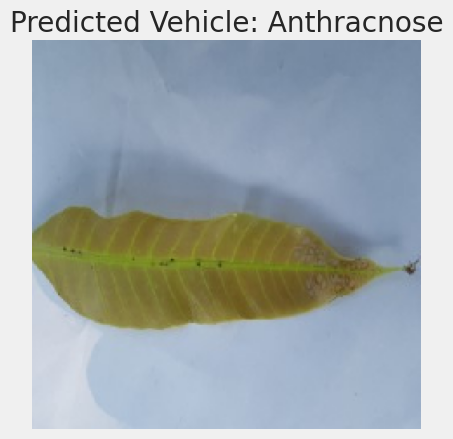

In [41]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):
    
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    predicted_class_label = class_labels[predicted_class_index]
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Vehicle: {predicted_class_label}")
    plt.show()

# Load your trained model
model.load_weights('/kaggle/working/my_model_weights.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = list(train_gen.class_indices.keys())

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)


1/1 [==============================] - 0s 42ms/step


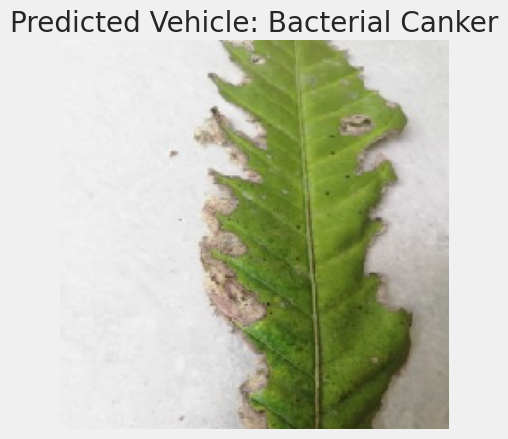

In [42]:
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Bacterial Canker/IMG_20211106_120951 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 43ms/step


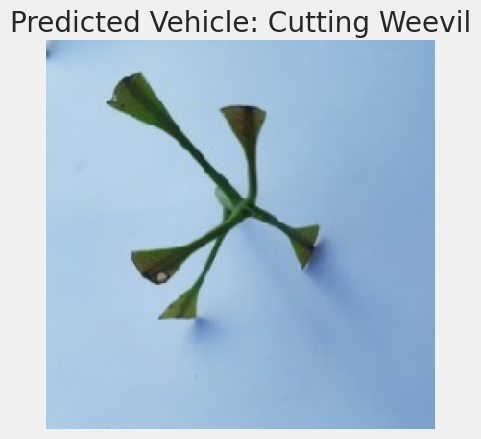

In [43]:
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Cutting Weevil/20211011_160708 (Custom) (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 42ms/step


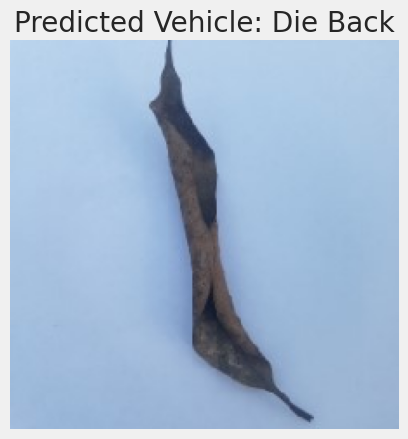

In [44]:
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Die Back/20211129_160627 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 42ms/step


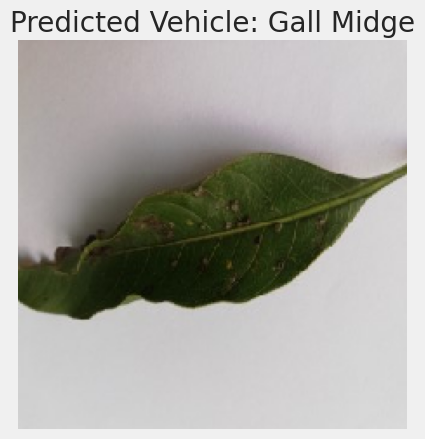

In [45]:
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Gall Midge/IMG_20211106_161226 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 41ms/step


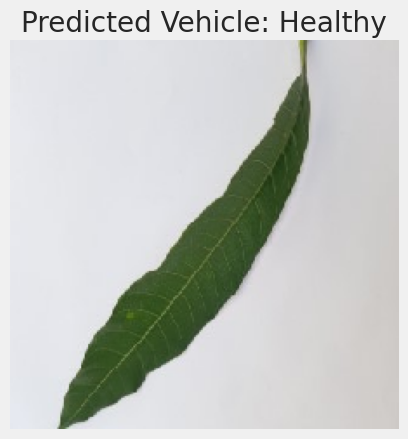

In [46]:
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Healthy/20211231_123625 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 44ms/step


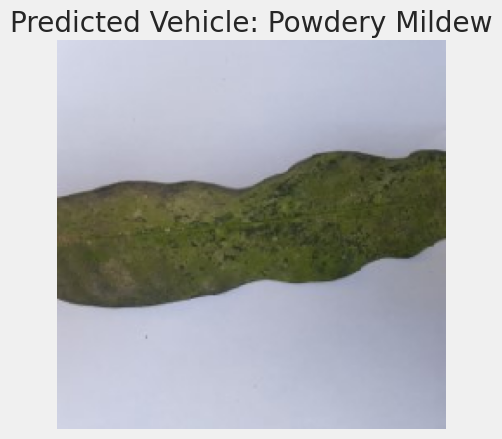

In [47]:
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Powdery Mildew/20211109_121452 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 41ms/step


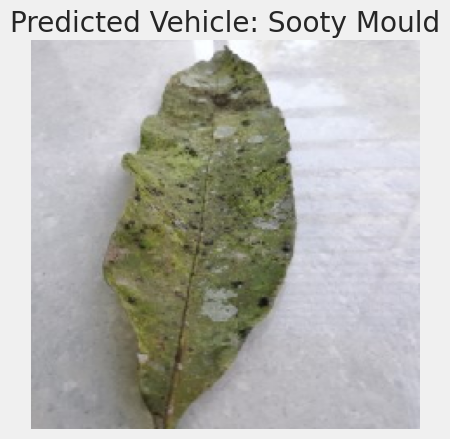

In [48]:
image_path_to_test = '/kaggle/input/mango-leaf-disease-dataset/MangoLeafBD Dataset/Sooty Mould/IMG_20211108_121234 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

<a id="11"></a>
## <b>11 <span style='color:#B21010'>||</span>Author Message</b>

<p style="background-color:#DEF5B9;font-family:newtimeroman;color:#1D3E06;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> If you have any advice for me I will be grateful to leave it to me in the comments!<br>✨Best Wishes✨</p>